# Working With Data

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

## Pandas!

In [1]:
import pandas as pd

## DataFrame

In [112]:
s = pd.Series(np.random.rand(20))
s

0     0.088114
1     0.407038
2     0.759186
3     0.635809
4     0.570806
5     0.137096
6     0.120503
7     0.701027
8     0.446805
9     0.417156
10    0.863950
11    0.040791
12    0.640582
13    0.070856
14    0.011636
15    0.975816
16    0.047596
17    0.137883
18    0.435957
19    0.326004
dtype: float64

In [9]:
print(s.index)
print(s.values)

RangeIndex(start=0, stop=20, step=1)
[ 0.5206791   0.46713023  0.72747643  0.13477516  0.8369139   0.97590977
  0.40017438  0.67559899  0.55187907  0.28172635  0.94498738  0.45770794
  0.32254568  0.6693352   0.66279005  0.10255661  0.60268569  0.44172566
  0.90041708  0.94223578]


In [10]:
s.describe()

count    20.000000
mean      0.580963
std       0.261670
min       0.102557
25%       0.431338
50%       0.577282
75%       0.754836
max       0.975910
dtype: float64

In [110]:
df = pd.DataFrame({'ser1': s, 'ser2': np.random.randn(20)})
df.head()

,ser1,ser2
0,0.520679,-0.007865
1,0.467130,-0.027841
2,0.727476,-0.652421
3,0.134775,-1.365230
4,0.836914,-0.528210


In [13]:
df.describe()

,ser1,ser2
count,20.000000,20.000000
mean,0.580963,-0.114112
std,0.261670,0.925484
min,0.102557,-1.677225
25%,0.431338,-0.759942
50%,0.577282,-0.369342
75%,0.754836,0.459733
max,0.975910,1.839816


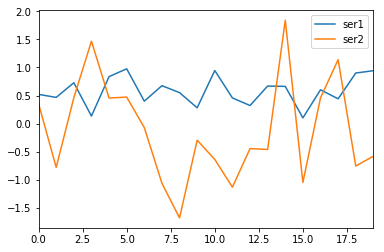

In [16]:
df.plot()

In [23]:
df['ser1']

0     0.520679
1     0.467130
2     0.727476
3     0.134775
4     0.836914
5     0.975910
6     0.400174
7     0.675599
8     0.551879
9     0.281726
10    0.944987
11    0.457708
12    0.322546
13    0.669335
14    0.662790
15    0.102557
16    0.602686
17    0.441726
18    0.900417
19    0.942236
Name: ser1, dtype: float64

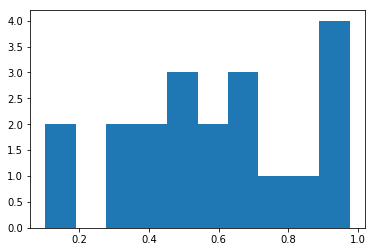

In [25]:
df['ser1'].hist(grid=False);

## Grouping Data

In [123]:
# make some fake data
N = 100
classes = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
vals = cmean[classes]+np.random.randn(N)*cvars[classes]
df = pd.DataFrame({
    'class': classes,
    'value': vals
})

In [124]:
df.head(10)

,class,value
0,0,0.183698
1,1,0.180861
2,3,0.257298
3,1,0.297106
4,0,-0.035465
5,2,0.235234
6,1,0.129786
7,0,-0.148311
8,2,-0.004433
9,0,0.246544


In [125]:
df.groupby('class').size()

class
0    31
1    18
2    26
3    25
dtype: int64

In [126]:
df.groupby('class')['value'].mean()

class
0    0.069285
1    0.198956
2    0.160435
3    0.352650
Name: value, dtype: float64

In [127]:
df.groupby('class')['value'].std()

class
0    0.212998
1    0.105832
2    0.583703
3    0.250717
Name: value, dtype: float64

In [138]:
df.groupby('class')['value'].apply(lambda x: np.mean(np.abs(x-np.mean(x))))

class
0    0.163399
1    0.080990
2    0.408484
3    0.194294
Name: value, dtype: float64

In [139]:
grp = df.groupby('class')['value']
pd.DataFrame({
    'mean': grp.mean(),
    'stdv': grp.std(),
    'absd': grp.apply(lambda x: np.mean(np.abs(x-np.mean(x))))
})

,absd,mean,stdv
class,,,
0,0.163399,0.069285,0.212998
1,0.080990,0.198956,0.105832
2,0.408484,0.160435,0.583703
3,0.194294,0.352650,0.250717


## Time Series

In [67]:
days = pd.date_range('2016-01-01', '2016-12-31', freq='D')
vals = np.cumsum(np.random.randn(len(days)))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')

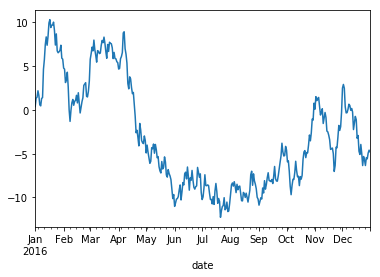

In [68]:
df.plot(legend=False);

In [92]:
df.groupby(pd.TimeGrouper('MS')).std()

,price
date,
2016-01-01,3.365145
2016-02-01,1.528464
2016-03-01,0.822388
2016-04-01,4.223977
2016-05-01,1.636109
2016-06-01,1.236107
2016-07-01,1.149879
2016-08-01,0.918116
2016-09-01,1.840545


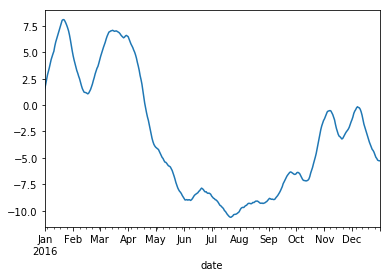

In [102]:
df.rolling(20, center=True, min_periods=1).mean().plot(legend=False);

## Joining

In [115]:
mapp = pd.Series({x: 2*x for x in range(10)}, name='twox')
mapp

0     0
1     2
2     4
3     6
4     8
5    10
6    12
7    14
8    16
9    18
Name: twox, dtype: int64

In [116]:
init = pd.DataFrame({'ser': np.random.randint(10, size=100)})
init.head()

,ser
0,3
1,7
2,4
3,3
4,4


In [119]:
final = init.join(mapp, on='ser')
final.head()

,ser,twox
0,3,6
1,7,14
2,4,8
3,3,6
4,4,8


In [121]:
final['ratio'] = final['twox']/final['ser']
final.head()

,ser,twox,ratio
0,3,6,2.0
1,7,14,2.0
2,4,8,2.0
3,3,6,2.0
4,4,8,2.0


## Plotting

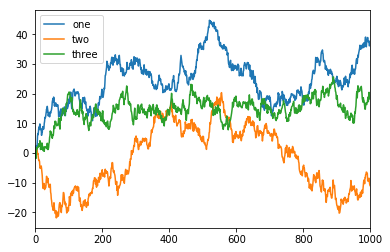

In [145]:
# good way to arrange plots
pd.DataFrame(np.cumsum(np.random.randn(1000, 3), axis=0), columns=['one', 'two', 'three']).plot()